In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms
import pandas as pd

In [2]:
def confidence_ellipse(x, y, ax, n_std, facecolor, **kwargs):
    """
    Create a plot of the covariance confidence ellipse of *x* and *y*.

    Parameters
    ----------
    x, y : array-like, shape (n, )
        Input data.

    ax : matplotlib.axes.Axes
        The axes object to draw the ellipse into.

    n_std : float
        The number of standard deviations to determine the ellipse's radiuses.

    **kwargs
        Forwarded to `~matplotlib.patches.Ellipse`

    Returns
    -------
    matplotlib.patches.Ellipse
    """
    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensionl dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                      facecolor=facecolor, **kwargs)

    # Calculating the stdandard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    # calculating the stdandard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

In [17]:
column_names

['omegabh2',
 'omegach2',
 'theta',
 'tau',
 'logA',
 'ns',
 'calPlanck',
 'acib217',
 'xi',
 'asz143',
 'aps100',
 'aps143',
 'aps143217',
 'aps217',
 'aksz',
 'kgal100',
 'kgal143',
 'kgal143217',
 'kgal217',
 'galfTE100',
 'galfTE100143',
 'galfTE100217',
 'galfTE143',
 'galfTE143217',
 'galfTE217',
 'cal0',
 'cal2',
 'H0*',
 'omegal*',
 'omegam*',
 'omegamh2*',
 'omegamh3*',
 'sigma8*',
 'S8*',
 's8omegamp5*',
 's8omegamp25*',
 's8h5*',
 'rdragh*',
 'rmsdeflect*',
 'zrei*',
 'A*',
 'clamp*',
 'DL40*',
 'DL220*',
 'DL810*',
 'DL1420*',
 'DL2000*',
 'ns02*',
 'yheused*',
 'YpBBN*',
 'DHBBN*',
 'age*',
 'zstar*',
 'rstar*',
 'thetastar*',
 'DAstar*',
 'zdrag*',
 'rdrag*',
 'kd*',
 'thetad*',
 'zeq*',
 'keq*',
 'thetaeq*',
 'thetarseq*',
 'Hubble015*',
 'DM015*',
 'Hubble038*',
 'DM038*',
 'Hubble051*',
 'DM051*',
 'Hubble061*',
 'DM061*',
 'Hubble233*',
 'DM233*',
 'fsigma8z015*',
 'sigma8z015*',
 'fsigma8z038*',
 'sigma8z038*',
 'fsigma8z051*',
 'sigma8z051*',
 'fsigma8z061*',
 'sigm

In [26]:
# MCMC chain samples
samples1 = np.loadtxt('/Users/hbowden/Downloads/COM_CosmoParams_base-plikHM-TTTEEE-lowl-lowE_R3.00/base/plikHM_TTTEEE_lowl_lowE/base_plikHM_TTTEEE_lowl_lowE_1.txt')
samples2 = np.loadtxt('/Users/hbowden/Downloads/COM_CosmoParams_base-plikHM-TTTEEE-lowl-lowE_R3.00/base/plikHM_TTTEEE_lowl_lowE/base_plikHM_TTTEEE_lowl_lowE_2.txt')
samples3 = np.loadtxt('/Users/hbowden/Downloads/COM_CosmoParams_base-plikHM-TTTEEE-lowl-lowE_R3.00/base/plikHM_TTTEEE_lowl_lowE/base_plikHM_TTTEEE_lowl_lowE_3.txt')

# load the column names for the samples
column_names_raw = np.loadtxt('/Users/hbowden/Downloads/COM_CosmoParams_base-plikHM-TTTEEE-lowl-lowE_R3.00/base/plikHM_TTTEEE_lowl_lowE/base_plikHM_TTTEEE_lowl_lowE.paramnames', dtype=np.str, usecols=[0])
column_names = [x.replace("b'",'').replace("'",'') for x in column_names_raw]

# make a data frame with column names and samples
samples1_df = pd.DataFrame(samples1[:,2:], columns=column_names) # first two columns are not important
samples2_df = pd.DataFrame(samples2[:,2:], columns=column_names)
samples3_df = pd.DataFrame(samples3[:,2:], columns=column_names)

In [27]:
w_m1 = np.array(samples1_df['omegam*'])
H01 = np.array(samples1_df['H0*'])

w_m2 = np.array(samples2_df['omegam*'])
H02 = np.array(samples2_df['H0*'])

w_m3 = np.array(samples3_df['omegam*'])
H03 = np.array(samples3_df['H0*'])

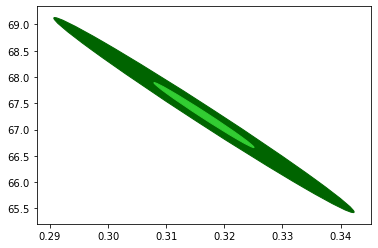

In [31]:
fig, ax = plt.subplots()
ax.scatter(w_m,H0,s=2,alpha=0.0)
a1 = confidence_ellipse(w_m1, H01, ax, n_std = 3., 
                   facecolor='darkgreen',edgecolor='darkgreen')
b1 = confidence_ellipse(w_m1, H01, ax, n_std = 1., 
                   facecolor='limegreen',edgecolor='limegreen')
"""
a2 = confidence_ellipse(w_m2, H02, ax, n_std = 3., 
                   facecolor='None',edgecolor='darkred')
b2 = confidence_ellipse(w_m2, H02, ax, n_std = 1., 
                   facecolor='red',edgecolor='red')

a3 = confidence_ellipse(w_m3, H03, ax, n_std = 3., 
                   facecolor='None',edgecolor='darkblue')
b3 = confidence_ellipse(w_m3, H03, ax, n_std = 1., 
                   facecolor='blue',edgecolor='blue')"""

plt.show()

In [22]:
# MCMC chain samples
samples1 = np.loadtxt('/Users/hbowden/Downloads/COM_CosmoParams_base-plikHM-TTTEEE-lowl-lowE_R3.00/base/plikHM_TTTEEE_lowl_lowE_lensing/base_plikHM_TTTEEE_lowl_lowE_lensing_post_BAO_Pantheon_zre6p5_1.txt')
samples2 = np.loadtxt('/Users/hbowden/Downloads/COM_CosmoParams_base-plikHM-TTTEEE-lowl-lowE_R3.00/base/plikHM_TTTEEE_lowl_lowE_lensing/base_plikHM_TTTEEE_lowl_lowE_lensing_post_BAO_Pantheon_zre6p5_2.txt')
samples3 = np.loadtxt('/Users/hbowden/Downloads/COM_CosmoParams_base-plikHM-TTTEEE-lowl-lowE_R3.00/base/plikHM_TTTEEE_lowl_lowE_lensing/base_plikHM_TTTEEE_lowl_lowE_lensing_post_BAO_Pantheon_zre6p5_3.txt')

# load the column names for the samples
column_names_raw = np.loadtxt('/Users/hbowden/Downloads/COM_CosmoParams_base-plikHM-TTTEEE-lowl-lowE_R3.00/base/plikHM_TTTEEE_lowl_lowE_lensing/base_plikHM_TTTEEE_lowl_lowE_lensing_post_BAO_Pantheon_zre6p5.paramnames', dtype=np.str, usecols=[0])
column_names = [x.replace("b'",'').replace("'",'') for x in column_names_raw]

# make a data frame with column names and samples
samples1_df = pd.DataFrame(samples[:,2:], columns=column_names) # first two columns are not important

In [23]:
w_m = np.array(samples1['omegam*'])
H0 = np.array(samples1['H0*'])

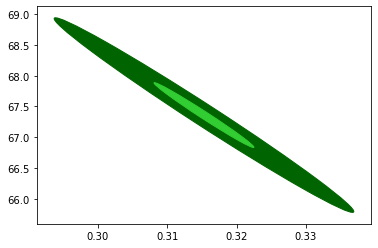

In [24]:
fig, ax = plt.subplots()
ax.scatter(w_m,H0,s=2,alpha=0.0)
a = confidence_ellipse(w_m, H0, ax, n_std = 3., 
                   facecolor='darkgreen',edgecolor='darkgreen')
b = confidence_ellipse(w_m, H0, ax, n_std = 1., 
                   facecolor='limegreen',edgecolor='limegreen')
plt.show()